# Notebook n°1

 ### Schéma upwind
 On traitera dans cette partie 3 cas distincts :
 - à vitesse constante,
 - à vitesse variables positives, 
 - à vitesse négatives

In [1]:
import  numpy  as np
import  matplotlib.pyplot  as plt
import  matplotlib.animation  as  animation

# Définition du schéma upwind :

In [2]:
def upwind(u, beta, dt, dx):
     # Calcul des flux u_{j+1/2}, il y en a la taille de u + 1
     # Allocation du tableau
     u_flux = np.empty(u.size + 1)

     # u_{j+1/2} = u_{j+1}
     u_flux[1:] = u

     # Condition périodique
     u_flux[0] = u_flux[-1]
        
     # Attention u =alpha dans le systeme qu'on veut resoudre
     # alpha[n+1,j] = alpha[n,j] - u * dt / dx * (alpha[n,j+1] - alpha[n,j-1])
     #u -=  a * dt / dx * (u_flux[1:] - u_flux[:-1]) #beta = a * dt / dx
     u -=  beta * (u_flux[1:] - u_flux[:-1]) 
     return(u)

### Définition de la condition initiale : 

In [3]:
def init_cond(x):
    u=np.zeros(len(x))
    u[X>0.4]=1
    u[X>0.6]=0
    return(u)

In [4]:
N_t = 50 #N_t >N_x nous garantit le respect de la condition CFL
N_x = 30
dt= 1/(N_t-1)
dx=1/(N_x-1) 
T=1

In [5]:
X= np.linspace(0,1,N_x)
u0 = init_cond(X)
beta= 0.5
cfl = max(u0)*dt/dx

stock=np.empty((N_x,N_t))
stock[:,0]=u0
i=0
while (cfl <1) & (i<N_t-1):
    i= i+1
    #vérification de la condition cfl
    cfl = max(u0)*dt/dx
    u1 = upwind(u0,beta,dt,dx)
    u0 = u1
    stock[:,i]=u1

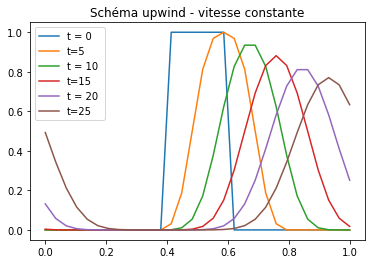

In [6]:
plt.plot(X,stock[:,0])
plt.title("Schéma upwind - vitesse constante")
plt.plot(X,stock[:,5])
plt.plot(X,stock[:,10])
plt.plot(X,stock[:,15])
plt.plot(X,stock[:,20])
plt.plot(X,stock[:,25])
plt.legend(["t = 0 ", "t=5","t = 10 ", "t=15","t = 20 ", "t=25"])

In [7]:
### A vitesse variable :

Si on veut par exemple augmenter la vitesse au cours du temps : 

In [8]:
X= np.linspace(0,1,N_x)
u0 = init_cond(X)
#On définit une vitesse variable croissante
beta=np.sort(np.random.rand(N_t))
# Pour stocker les solutions du probleme
stock=np.empty((N_x,N_t))
stock[:,0]=u0
i=0
cfl = max(u0)*dt/dx
while (cfl <1) & (i<N_t-1):
    #vérification de la condition cfl
    cfl = max(u0)*dt/dx
    i= i+1
    u1 = upwind(u0,beta[i-1],dt,dx)
    u0 = u1
    stock[:,i]=u1

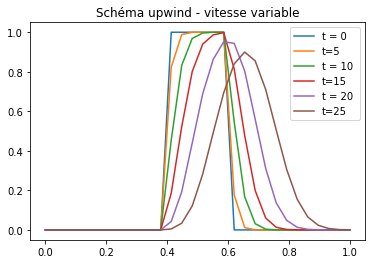

In [9]:
plt.plot(X,stock[:,0])
plt.title("Schéma upwind - vitesse variable")
plt.plot(X,stock[:,5])
plt.plot(X,stock[:,10])
plt.plot(X,stock[:,15])
plt.plot(X,stock[:,20])
plt.plot(X,stock[:,25])
plt.legend(["t = 0 ", "t=5","t = 10 ", "t=15","t = 20 ", "t=25"])